##                                 Stock Price Prdiction Using Prophet

#### Import necessary libraries

In [14]:
from pandas_datareader import data as pdr
import yfinance as yf
import datetime as dt
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
from fbprophet import Prophet

#### Create a dataframe having OPEN, HIGH ,LOW, CLOSE, ADJ CLOSE,VOLUME attributes of stock
#### Specify Start and end date

In [2]:
yf.pdr_override() 
f = pdr.get_data_yahoo("GOOGL",start="2010-01-01", end="2019-12-09")
print(f)
f.reset_index(level=0, inplace=True)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


[*********************100%***********************]  1 of 1 completed
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2010-01-04   313.788788   315.070068   312.432434   313.688690   313.688690   
2010-01-05   313.903900   314.234222   311.081085   312.307312   312.307312   
2010-01-06   313.243256   313.243256   303.483490   304.434448   304.434448   
2010-01-07   305.005005   305.305298   296.621613   297.347351   297.347351   
2010-01-08   296.296295   301.926941   294.849854   301.311310   301.311310   
...                 ...          ...          ...          ...          ...   
2019-12-02  1302.560059  1305.439941  1280.380005  1288.859985  1288.859985   
2019-12-03  1278.660034  1297.229980  1277.050049  1294.739990  1294.739990   
2019-12-04  1306.099976  1324.270020  1303.050049  1318.939941  1318.939941   
2019-12-05  1327.000000  1327.979980  1314.319946  1326.959961

### For training prophet we only require two columns
### Creating a small dataframe with two columns i.e Date and Adj Close

In [3]:
df= f[['Date','Adj Close']]

#### Rename columns

In [4]:
df.columns=['ds','y']

#### Print small dataframe

In [5]:
print(df)

             ds            y
0    2010-01-04   313.688690
1    2010-01-05   312.307312
2    2010-01-06   304.434448
3    2010-01-07   297.347351
4    2010-01-08   301.311310
...         ...          ...
2495 2019-12-02  1288.859985
2496 2019-12-03  1294.739990
2497 2019-12-04  1318.939941
2498 2019-12-05  1326.959961
2499 2019-12-06  1339.390015

[2500 rows x 2 columns]


### Training model using small dataframe with two columns

In [7]:
m = Prophet(daily_seasonality=True)
m.fit(df)

### Create a future dataframe which has only one date column
### Here we are predicting for next one year so period=365

In [8]:
future = m.make_future_dataframe(periods=365)

In [9]:
future.tail()

,ds
2860,2020-12-01
2861,2020-12-02
2862,2020-12-03
2863,2020-12-04
2864,2020-12-05


### Forecast the stock prices for next one year
### The dataframe created will have Average value after one year, Lower threshold value and Upper threshold
### after one year

In [10]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2860,2020-12-01,1306.874529,1230.240783,1387.215579
2861,2020-12-02,1307.006755,1219.724995,1391.454458
2862,2020-12-03,1307.100106,1223.791596,1386.397413
2863,2020-12-04,1306.691597,1224.106028,1388.426749
2864,2020-12-05,1313.005776,1234.337413,1401.506237


### Graphical representation of price prediction

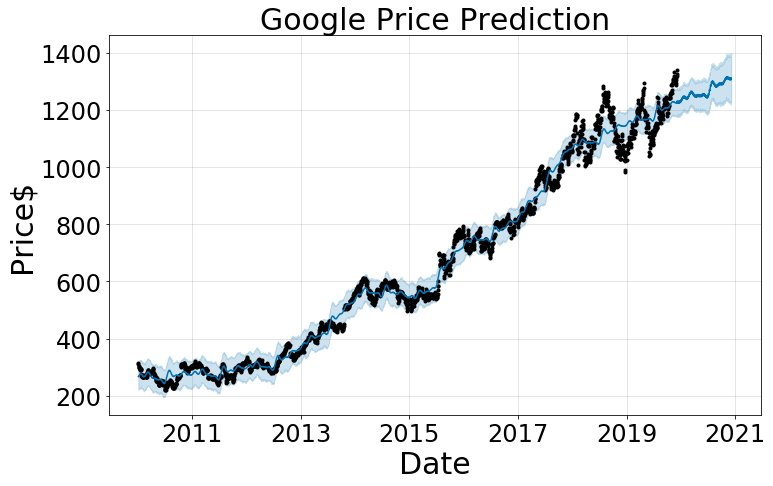

In [22]:
fig = m.plot(forecast, xlabel='Date', ylabel='Price$')
ax = fig.gca()
ax.set_title("Google Price Prediction", size=30)
ax.set_xlabel("Date", size=30)
ax.set_ylabel("Price$", size=30)
ax.tick_params(axis="x", labelsize=24)
ax.tick_params(axis="y", labelsize=24)

### Seasionality curves

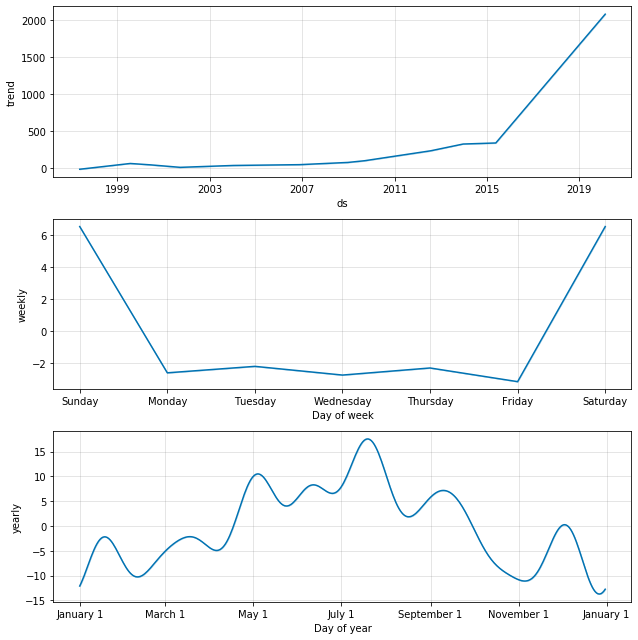

In [21]:
fig2 = m.plot_components(forecast)